# Applying Fully Connected Neural Networks

In this activity you will learn how to apply dense neural networks in Keras. 

The dataset that will be studied is a collection of simulated particle events from Pythia. Specifically, you will construct a dense neural network which will learn how to calculate the invariant mass of a particle from its energy and momentum.

First, import numpy, tensorflow, and pylab and load the data.


In [21]:
import numpy as np
import tensorflow as tf
import pylab as plt

# Prevent TensorFlow from showing us deprecation warnings
tf.logging.set_verbosity(tf.logging.ERROR)

# MPK comp hack. You should not need this.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [22]:
# import data
data = np.load("../data/homogenous-16-particle-events-energy.npy")
print(data.shape)
print(data)

(35916, 80)
[[-0.492933  -0.469448  -2.22871   ... -1.76367    2.01211    1.       ]
 [-0.0211283  0.513518   0.0569839 ... -0.542793   1.1322     1.       ]
 [-0.238883   0.0107631 -1.43853   ... -3.65355    3.77525    1.       ]
 ...
 [-0.494778  -0.19824    1.59491   ... -3.39528    3.60725    1.       ]
 [-0.550329   0.533369   0.111079  ... -0.179829   1.05863    1.       ]
 [-0.444629   0.980696   0.676546  ... -2.62229    2.8243     1.       ]]


The datset is a 2D array where each row represents one event of data from an electron-proton collision. This dataset is comprised ONLY of events where there were exactly 16 particles produced from an electron-proton collision. Each particle has an x-momentum,  y-momentum, z-momentum, energy, and charge: $(p_x,p_y,p_z,E,q)$. Each event is therefore represented by 80 numbers. Using numpy's reshape method we can make each row represent one particle.  

In [23]:
data = np.reshape(data,(len(data),16,5))
print(data.shape)
data = np.reshape(data, (len(data)*16,5))
print(data.shape)

(35916, 16, 5)
(574656, 5)


These are our training data inputs, but we also must provide the targets, which are the invariant masses of each particle. This is a straightforward computation that does not require neural networks, but provides an easy-to-understand problem.

We choose units where $c = 1$:
$$m^2=E^2-||\textbf{p}||^2$$
where $m, E$, and $\textbf{p}$ are all in GeV.

In [24]:
p2 = data[:,0]**2 + data[:,1]**2 + data[:,2]**2
target = np.sqrt(np.maximum(data[:,3]**2 - p2,0))
print(target)

[0.13953852 0.13957194 0.13949486 ... 0.1395683  0.13957045 0.93825666]


There are several hundred thousand datapoints in this dataset which is overkill for this simple example. Create a test dataset with just 1000 examples.

In [25]:
smallTarget=target[:1000]
smallEnergy=data[:1000]

Next, make a histogram of the target data to make sure that we are seeing masses of real particles. As this data has limited precision, this will not resolve electrons very well, but protons, pions, and massless particles should be clearly visible.

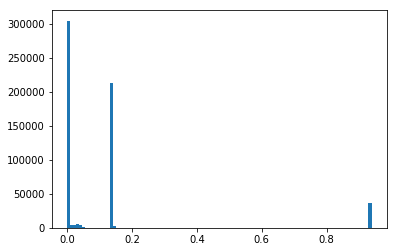

In [26]:
plt.hist(target,bins=100)
plt.show()

Now we can build and train the first neural network. Start with a simple one hidden layer network with 5 neurons, and ReLU activation. Train for 30 epochs with a batch size of 256, an Adam optimizer with a learning rate of 0.1, using mean squared error loss. 

Additionally, use a validation split of 0.8 when fitting to check for overtraining. Information on how to implement these features can be found here:
<https://www.tensorflow.org/api_docs/python/tf/keras>.
Check out Sequential underneath models and Dense under layers.


In [27]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(5,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(5,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy,smallTarget,epochs=30, batch_size=256, validation_split=0.8)

Train on 199 samples, validate on 801 samples
Epoch 1/30
199/199 [==============================] - 1s 6ms/sample - loss: 1.2938 - val_loss: 0.1511
Epoch 2/30
199/199 [==============================] - 0s 50us/sample - loss: 0.1491 - val_loss: 0.1528
Epoch 3/30
199/199 [==============================] - 0s 64us/sample - loss: 0.1266 - val_loss: 0.2339
Epoch 4/30
199/199 [==============================] - 0s 75us/sample - loss: 0.1773 - val_loss: 0.1948
Epoch 5/30
199/199 [==============================] - 0s 62us/sample - loss: 0.1525 - val_loss: 0.1306
Epoch 6/30
199/199 [==============================] - 0s 86us/sample - loss: 0.1100 - val_loss: 0.0919
Epoch 7/30
199/199 [==============================] - 0s 101us/sample - loss: 0.0798 - val_loss: 0.0738
Epoch 8/30
199/199 [==============================] - 0s 96us/sample - loss: 0.0640 - val_loss: 0.0630
Epoch 9/30
199/199 [==============================] - 0s 62us/sample - loss: 0.0535 - val_loss: 0.0558
Epoch 10/30
199/199 [======

[0.00000000e+00 0.00000000e+00 3.50411301e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.37491406e-01 1.39568299e-01
 1.39570451e-01 9.38256655e-01]
[[0.04430274]
 [0.04430274]
 [0.04430274]
 [0.04430274]
 [0.04430274]
 [0.04430274]
 [0.04430274]
 [0.19727278]
 [0.1932731 ]
 [0.25026765]]


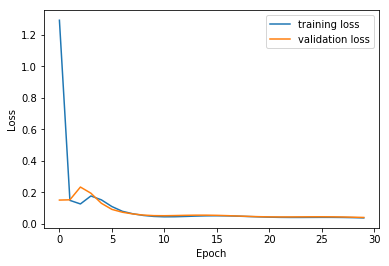

In [28]:
history = results.history
print(target[-10:])
y = model.predict(data[-10:])
print(y)
plt.plot(history["loss"], label="training loss")
plt.plot(history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

The model is learning, but we can do better. Try increasing the number of hidden neurons to 20.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.01),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(smallEnergy,smallTarget,epochs=30, batch_size=256, validation_split=0.8)

That did not do much better, try decreasing the batch size to 16.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(smallEnergy,smallTarget,epochs=30, batch_size=16, validation_split=0.8)
print(target[-10:])
y = model.predict(data[-10:])
print(y)

This is starting to do better but has room for improvemnt. Perhpas the learning rate is to high and the network can't fine tune. Try decreasing the learning rate to 0.001.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(smallEnergy,smallTarget,epochs=30, batch_size=16, validation_split=0.8)

This is not really that mutch better, but now there is evidence of overtraining, as the training loss is so much lower than the validation loss. A common fix to this is adding dropout layers. Try adding a dropout layer with dropout rate of 0.5.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(smallEnergy,smallTarget,epochs=30, batch_size=16, validation_split=0.8)

This clearly stoped the overtraining problem, but it still isn't training well. Now, try training on the full dataset with a more reasonable validation split of 0.2. Use the a single hidden layer with 20 neurons, a learning rate of 0.001, and a batch size of 256. Just run it for 10 epochs.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(data,target,epochs=10, batch_size=256, validation_split=0.2)

This resulted in significant improvement and shows how important having a large enough dataset it. Moving on to the choice in activation functions, ReLU is not the only available choice, although it is currently the most popular for deep networks. 

Train a network using a sigmoid and/or tanh activation function.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="sigmoid")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(data,target,epochs=10, batch_size=256, validation_split=0.2)

model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="tanh")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(data,target,epochs=10, batch_size=256, validation_split=0.2)

Next, try adding 2 new hidden layers to the network. Use the relu activation function.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20,input_shape=(20,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20,input_shape=(20,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(data,target,epochs=10, batch_size=256, validation_split=0.2)

Clearly, adding more layers helps improve the quality of the network. There is a limit to now effective this is though. Try having 5 hidden layers.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20,input_shape=(20,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20,input_shape=(20,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20,input_shape=(20,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20,input_shape=(20,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(20,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(energy,target,epochs=10, batch_size=256, validation_split=0.2)

Now, see what happens when you increase the number of neurons per layer from 20 to 50 in the 3 hidden layer model. Consider how they perform compared to Relu now. 

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50,input_shape=(5,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,input_shape=(50,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,input_shape=(50,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(50,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(energy,target,epochs=10, batch_size=256, validation_split=0.2)

Try using the sigmoid and the tanh activation functions again and compare them to relu.

In [ ]:
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50,input_shape=(5,),activation="sigmoid")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,input_shape=(50,),activation="sigmoid")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,input_shape=(50,),activation="sigmoid")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(50,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(energy,target,epochs=10, batch_size=256, validation_split=0.2)

model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50,input_shape=(5,),activation="tanh")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,input_shape=(50,),activation="tanh")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,input_shape=(50,),activation="tanh")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1,input_shape=(50,))) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(energy,target,epochs=10, batch_size=256, validation_split=0.2)

This difference in performace, especially with the sigmoid function, is known as the vanishing gradient problem. If the value for any one the neurons gets too far away from 0, the gradient for sigmoid and tanh gets really close to 0. This means that for deeper networks it is much more difficult to update the first layers as their gradient is so small. Now, remove the fifth column from the input data, the charge, and see what happens when training. Why do you thing including charge has such a large impact?

In [15]:
data = data[:,:4]
print(data)
model=tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(50,input_shape=(4,),activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(50,activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1)) #Add the output layer
model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
model.fit(data,target,epochs=10, batch_size=256, validation_split=0.2)

[[-0.492933  -0.469448  -2.22871    2.33452  ]
 [-0.380699   0.859243   0.125686   0.958388 ]
 [-0.234261   0.933082   1.29211    1.61695  ]
 ...
 [-0.248859  -0.3504    -0.667259   0.805869 ]
 [-0.0388911 -0.0695658  0.337187   0.373533 ]
 [-0.28336    0.373694  -2.62229    2.8243   ]]
Train on 459724 samples, validate on 114932 samples
Epoch 1/10
459724/459724 [==============================] - 12s 26us/sample - loss: 0.0117 - val_loss: 0.0039
Epoch 2/10
459724/459724 [==============================] - 10s 23us/sample - loss: 0.0036 - val_loss: 0.0029
Epoch 3/10
459724/459724 [==============================] - 11s 24us/sample - loss: 0.0029 - val_loss: 0.0025
Epoch 4/10
459724/459724 [==============================] - 11s 23us/sample - loss: 0.0027 - val_loss: 0.0025
Epoch 5/10
459724/459724 [==============================] - 11s 25us/sample - loss: 0.0026 - val_loss: 0.0024
Epoch 6/10
459724/459724 [==============================] - 11s 23us/sample - loss: 0.0025 - val_loss: 0.0026


Finally, there are other options for the loss function. Try experimenting with mean squared error. Other optimizers that can be used are sgd, rmsprop, adagrad, adadelta, adamax, and nadam. <https://www.tensorflow.org/api_docs/python/tf/keras/optimizers>

<https://www.tensorflow.org/api_docs/python/tf/keras/losses>

(array([5.4000e+01, 6.2000e+02, 3.4440e+03, 1.3922e+04, 1.4119e+04,
        6.2740e+03, 3.9510e+03, 3.4010e+03, 3.5520e+03, 5.7640e+03,
        8.8030e+03, 6.8770e+03, 4.7250e+03, 3.7760e+03, 3.4170e+03,
        3.0420e+03, 2.9260e+03, 2.5520e+03, 1.4790e+03, 7.3500e+02,
        2.1600e+02, 3.4000e+01, 3.0000e+01, 1.3000e+01, 7.0000e+00,
        7.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 5.00

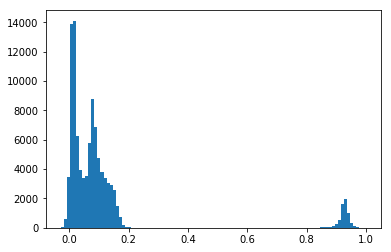

In [16]:
y = model.predict(data[-100000:])
plt.hist(y,bins=100)